Langkah 1 - Import Library

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

Langkah 2 - Load Data and Visualization

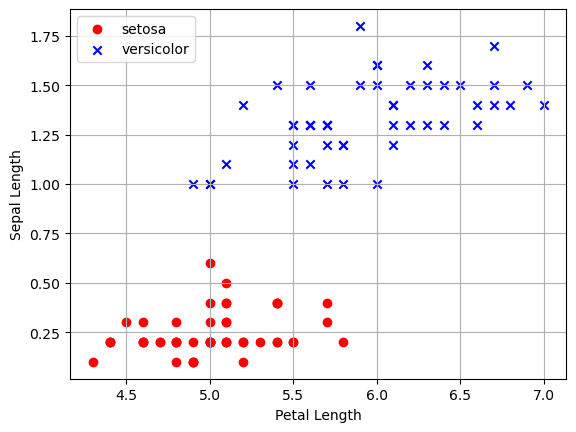

In [12]:
df = pd.read_csv('C:\Machine Learning\week9\iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Step 3 - Membuat Kelas Perceptron

In [13]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Step 4 - Pilih Data dan Encoding Label

In [14]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

Step 5 - Fitting Model

In [15]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Step 6 - Visualisasi Nilai Error Per Epoch

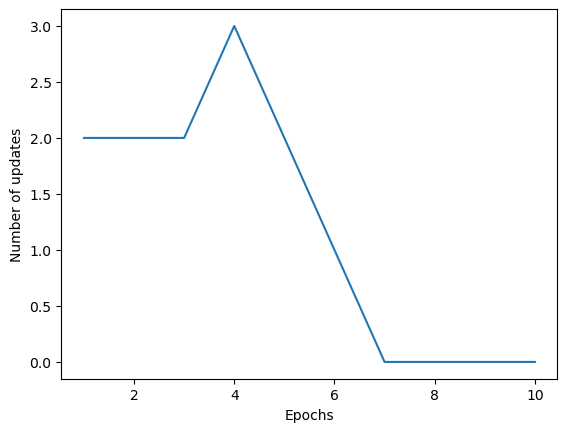

In [16]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Step 7 - Visualiasasi Decision Boundary

C:\Users\ACER\AppData\Local\Temp\ipykernel_1168\1850482066.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


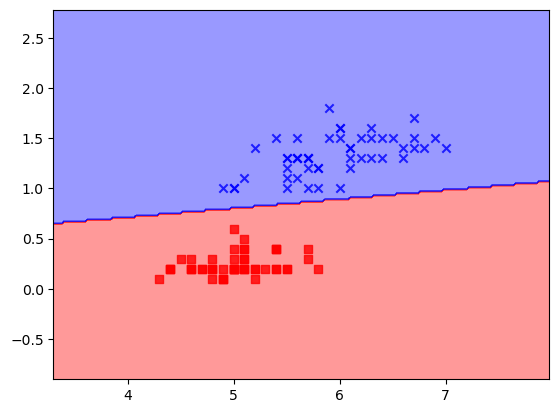

In [17]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


plot_decision_regions(X, y, ppn)
plt.show()

# Lab Work 2
Klasifikasi Berita dengan Perceptron



Step 1 - Import Library

In [18]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Step 2 - Pilih Label dan Split Data

In [19]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Step 3 - Ekstrak Fitur dan Buat Model Perceptron

In [20]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# Lab Work 3
*Nilai Logika XOR dengan MLP*



Step 1 - Import Library

In [45]:
from sklearn.neural_network import MLPClassifier

Step 2 - Buat Data

In [46]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Step 3 - Fit Model

In [47]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Step 4 - Prediksi

In [48]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Lab Work 4
*Klasifikasi dengan ANN*

Step 1 - Import Library

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf

Step 2 - Load Data

In [50]:
dataset = pd.read_csv('C:\Machine Learning\week9\Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

# Cek data (X)
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Step 3 - Encoding Data Kategorikal

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Step 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Step 5 - Split Data

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Step 6 - Scaling Fitur

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN



Step 1 - Inisiasi Model ANN

In [56]:
ann = tf.keras.models.Sequential()

Step 2 - Membuat Input Layer dan Hidden Layer Pertama

In [57]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Step 3 - Membuat Hidden Layer Kedua

In [58]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Step 4 - Membuat Output Layer

In [59]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model
Step 1 - Compile Model (Menyatukan Arsitektur) ANN

In [60]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Step 2 - Fitting Model

In [61]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


250/250 [==============================] - 4s 7ms/step - loss: 0.5921 - accuracy: 0.6979
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4725 - accuracy: 0.7958
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4472 - accuracy: 0.7977
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4344 - accuracy: 0.8067
Epoch 5/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4265 - accuracy: 0.8116
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4201 - accuracy: 0.8131
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4146 - accuracy: 0.8170
Epoch 8/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4103 - accuracy: 0.8202
Epoch 9/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4069 - accuracy: 0.8216
Epoch 10/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4039 - accuracy: 0.8229
E

**Modelkan Data Baru dan Buat Prediksi**

In [62]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 347ms/step
[[False]]


**Prediksi Dengan Data Testing**

In [63]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

 1/63 [..............................] - ETA: 4s

63/63 [==============================] - 0s 6ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Cek Akurasi dan Confusion Matrix**

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1523   72]
 [ 214  191]]


0.857

# LAB ASSIGNMENT WEEK 9

Step 1 - Pra pengolahan Data

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 17s 1us/step


Step 2 - Pemilihan Fitur

In [66]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

Step 3 - Arsitektur ANN
Activation function 'relu' for hidden layer and 'softmax' for output layer. 'Relu' is a commonly used function for hidden layers, and 'softmax' is used in multiclass classification problems.

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28 * 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Step 4 - Pelatihan Model

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 11ms/step - loss: 0.2373 - accuracy: 0.9298 - val_loss: 0.1149 - val_accuracy: 0.9653
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1003 - accuracy: 0.9691 - val_loss: 0.0931 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0709 - accuracy: 0.9771 - val_loss: 0.0797 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0521 - accuracy: 0.9832 - val_loss: 0.0800 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0414 - accuracy: 0.9862 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0338 - accuracy: 0.9888 - val_loss: 0.0824 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0807 -

Step 5 - Evaluasi Model dan Tes Akurasi

In [69]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0928 - accuracy: 0.9781
Test accuracy: 0.9781000018119812


Step 6 - Confusion Matrix

313/313 [==============================] - 2s 5ms/step


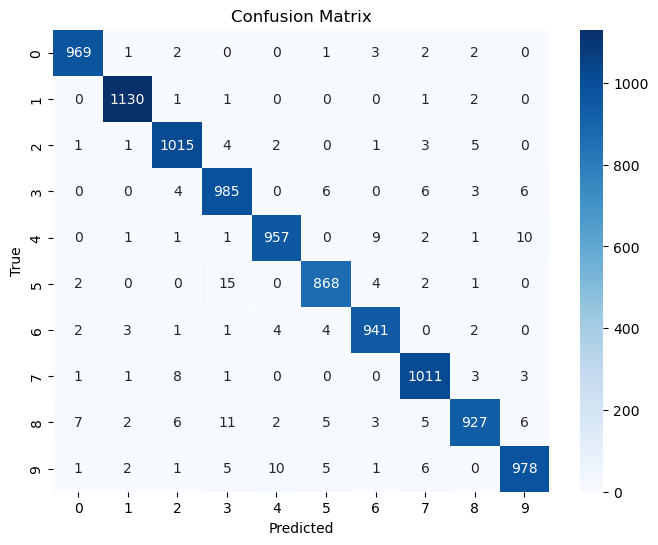

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels with your model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Test Data

1/1 [==============================] - 0s 72ms/step


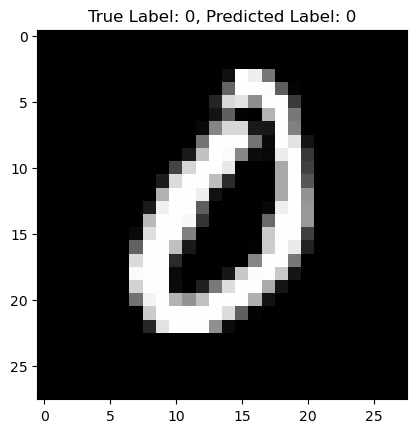

In [71]:
# Pilih indeks data pengujian acak
index = np.random.randint(0, len(x_test))

# Ambil satu gambar dari data pengujian
test_image = x_test[index]
true_label = y_test[index]

# Lakukan prediksi dengan model
predicted_label = model.predict(test_image.reshape(1, -1))
predicted_label = np.argmax(predicted_label)

# Plot gambar dan tampilkan prediksi serta label sebenarnya
plt.figure()
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()